# INIT

## Import and load the original data

In [1]:
import sys
sys.path.insert(1, '../') 
from utils.loader import Loader
from utils.data_processor import Data_processor
from utils.evaluator import Evaluator

from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, log_loss
from sklearn.metrics import make_scorer
import pandas as pd
from sklearn import tree
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import prince
import numpy as np

2024-11-25 10:57:25.823131: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-25 10:57:25.998490: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732528646.064225   21596 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732528646.088489   21596 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-25 10:57:26.250605: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
data = Loader.load_by_fueltype("Eléctrico")
label_encoder = LabelEncoder()
data["price_categ"].value_counts()

/home/lingfeng/Desktop/repos/Cars_Price_Prediction/Trees/../utils/loader.py:153: DtypeWarning: Columns (120) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,
/home/lingfeng/Desktop/repos/Cars_Price_Prediction/Trees/../utils/loader.py:153: DtypeWarning: Columns (120) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,
/home/lingfeng/Desktop/repos/Cars_Price_Prediction/Trees/../utils/loader.py:165: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the 

price_categ
Middle low range     1353
Luxury               1182
Premiun              1113
Middle range          820
High end              767
Middle high range     727
Budget                483
Low end               141
Very low end            5
Name: count, dtype: int64

### Describe some columns
A more detailed version of the dataset can be found in the DataDescription.ipynb

In [3]:
data.select_dtypes(include=['category'])

,color,brand,model,version,fuelType,bodyTypeId,transmissionTypeId,province,environmentalLabel,jato_classification,...,Acabado Exterior_Pintura,Acabado Exterior_Rueda,AC_Zones,AC_Type,Metodo_Apertura,Tipo_Faro,interior_clock,arm_suppport_front,arm_suppport_back,price_categ
idx,,,,,,,,,,,,,,,,,,,,,
47362,Azul,SKODA,Citigo,CITIGOe iV Style 61kW 83CV Auto.,Eléctrico,Berlina,Automatico,Madrid,0,L1,...,pintura solida,no tiene,MONOZONA,AUTO,Mando a distancia,Otro,no tiene,no tiene,no tiene,Budget
47511,Gris / Plata,BMW,i3,94ah,Eléctrico,Berlina,Automatico,Madrid,0,B1,...,pintura bicolor solida,no tiene,MONOZONA,STANDARD,Teléfono móvil,LED,no tiene,no tiene,no tiene,Middle low range
47535,Azul,RENAULT,ZOE,Life R240,Eléctrico,Berlina,Automatico,Madrid,0,B1,...,pintura solida,no tiene,MONOZONA,AUTO,Mando a distancia,Otro,no tiene,no tiene,no tiene,Low end
47559,Negro,BMW,i3,S 120ah,Eléctrico,Berlina,Automatico,Vizcaya,0,B1,...,pintura bicolor solida,no tiene,MONOZONA,STANDARD,Teléfono móvil,LED,no tiene,no tiene,no tiene,Middle low range
47603,Gris / Plata (Gris),RENAULT,ZOE,Zen 100 kW R135 Bateria 50kWh,Eléctrico,Berlina,Automatico,Madrid,0,L1,...,pintura solida,no tiene,MONOZONA,AUTO,Tarjeta/llave inteligente,LED,no tiene,no tiene,no tiene,Middle low range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94291,Blanco,DACIA,Spring,Comfort Plus Electric 33kW 45CV,Eléctrico,Berlina,Automatico,Valladolid,0,L1,...,pintura solida,no tiene,MONOZONA,STANDARD,Mando a distancia,LED,no tiene,no tiene,no tiene,Budget
94342,Blanco,HYUNDAI,Kona,EV 100kW 136CV Tecno,Eléctrico,SUV,Automatico,Barcelona,NaN,M2,...,pintura perlada,no tiene,MONOZONA,AUTO,Tarjeta/llave inteligente,LED,no tiene,Tiene,Tiene,Middle low range
94359,Negro,TESLA,Model S,Ludicrous Performance 4WD,Eléctrico,Berlina,Automatico,Madrid,0,S1,...,pintura metalizada,no tiene,BIZONA,AUTO,Tarjeta/llave inteligente,LED,no tiene,Tiene,no tiene,Luxury


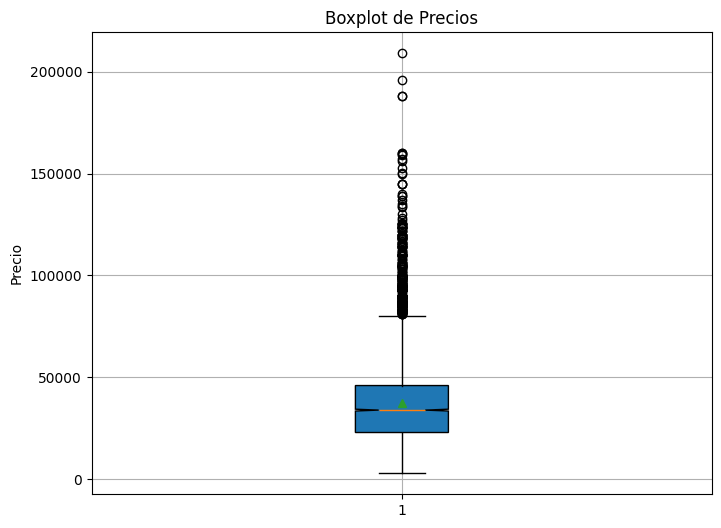

In [4]:
precios_electricos = data["price"]
plt.figure(figsize=(8, 6))
plt.boxplot(precios_electricos, notch=True, vert=True, patch_artist=True, showmeans=True)
plt.title('Boxplot de Precios')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

The related outliers were checked manually throught the data source, and we could confirmed that they are not outliers

In [5]:
Q1 = data['price'].quantile(0.25)
Q2 = data['price'].quantile(0.5)  # Esta es la mediana
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

upper_whisker = (Q3 + 1.5 * IQR)
print(upper_whisker)

data[data["fuelType"] == "Eléctrico"][data["price"]>upper_whisker][["price", "brand"]].sort_values(by='price', ascending=False)

80525.0


,price,brand
idx,,
28269,209000,MASERATI
85726,196000,MASERATI
144182,188000,MERCEDES-BENZ
134773,188000,MERCEDES-BENZ
21981,159900,PORSCHE
...,...,...
1917,81400,MERCEDES-BENZ
43135,80900,LEXUS
43136,80900,LEXUS


# Electric cars

## Numerical variables selection Eléctrico
Here we will perform PCA and use correlation matrix to select the most correlated numerical variables

In [6]:
def fill_electric_numerical_columns(numerical_columns: pd.DataFrame) -> pd.DataFrame:
    #fill the elemental columns that has a minor amount of missing data with the mode
    numerical_columns = Data_processor.fill_na_with_mode(numerical_columns, "dimensions.length")
    numerical_columns = Data_processor.fill_na_with_mode(numerical_columns, "dimensions.height")
    numerical_columns = Data_processor.fill_na_with_mode(numerical_columns, "electricFeatures.maximumBatteryKWH_kWh")
    numerical_columns = Data_processor.fill_na_with_mode(numerical_columns, "electricFeatures.onboardCharger_kW")
    numerical_columns = Data_processor.fill_na_with_mode(numerical_columns, "electricFeatures.range_KM")

    #fill the missing data witch regression, the parameters were based on the relation matrix 
    numerical_columns = Data_processor.impute_with_linear_regression(data=numerical_columns, x_columns=["dimensions.length", "dimensions.height"], y_column="dimensions.width")
    numerical_columns = Data_processor.impute_with_linear_regression(data=numerical_columns, x_columns=["dimensions.length", "dimensions.height", "dimensions.width"], y_column="trunkCapacityInLiters")
    numerical_columns = Data_processor.impute_with_linear_regression(data=numerical_columns, x_columns=["power_cv", "power_kw"], y_column="maxSpeed")
    numerical_columns = Data_processor.impute_with_linear_regression(data=numerical_columns, x_columns=["power_cv", "power_kw", "maxSpeed"], y_column="acceleration")
    numerical_columns = Data_processor.impute_with_linear_regression(data=numerical_columns, x_columns=["power_cv", "power_kw", "maxSpeed"], y_column="acceleration")
    numerical_columns = Data_processor.impute_with_linear_regression(data=numerical_columns, x_columns=["Llantas_Diametro_cm", "power_kw"], y_column="max_torque_nm")
    numerical_columns = Data_processor.impute_with_linear_regression(data=numerical_columns, x_columns=["electricFeatures.maximumBatteryKWH_kWh", "power_kw", "dimensions.length", "dimensions.height", "dimensions.width"], y_column="electricFeatures.combinedConsumption_kWh/")
    numerical_columns = Data_processor.impute_with_linear_regression(data=numerical_columns, x_columns=["electricFeatures.maximumBatteryKWH_kWh", "electricFeatures.combinedConsumption_kWh/", "power_kw"], y_column="electricFeatures.range_KM")
    numerical_columns.dropna(axis=1, inplace=True)
    return numerical_columns

def get_electric_numerical_columns (data: pd.DataFrame) -> pd.DataFrame:
    numerical_columns = data.select_dtypes(include=['number'])
    numerical_columns.drop(columns=[ "car_id", "electricFeatures.maxPower_CV"], inplace=True) # electricFeatures.maxPower_CV is = power_cv (Duplicated colums)

    #if all the values of the numerical columns is 0, we remove the column
    cols_to_drop = numerical_columns.columns[(numerical_columns == 0).all()]
    numerical_columns = numerical_columns.drop(cols_to_drop, axis=1)

    #Remove the column with all NAs
    max_nans = 6586
    thresh = numerical_columns.shape[0] - max_nans

    numerical_columns.dropna(axis=1, thresh=thresh+1, inplace=True)
    return fill_electric_numerical_columns(numerical_columns)

In [7]:
numerical_columns = get_electric_numerical_columns(data)

Regression mape ['dimensions.length', 'dimensions.height'] -> dimensions.width: 1.6468475373043987%
Regression mape ['dimensions.length', 'dimensions.height', 'dimensions.width'] -> trunkCapacityInLiters: 16.915082042969473%
Regression mape ['power_cv', 'power_kw'] -> maxSpeed: 5.689473571028928%
Regression mape ['power_cv', 'power_kw', 'maxSpeed'] -> acceleration: 13.035625391285736%
Regression mape ['power_cv', 'power_kw', 'maxSpeed'] -> acceleration: 11.854883719521563%
Regression mape ['Llantas_Diametro_cm', 'power_kw'] -> max_torque_nm: 17.854083487783615%
Regression mape ['electricFeatures.maximumBatteryKWH_kWh', 'power_kw', 'dimensions.length', 'dimensions.height', 'dimensions.width'] -> electricFeatures.combinedConsumption_kWh/: 17.204755109687113%
Regression mape ['electricFeatures.maximumBatteryKWH_kWh', 'electricFeatures.combinedConsumption_kWh/', 'power_kw'] -> electricFeatures.range_KM: 16.16138222681963%


In [8]:
correlation_matrix = numerical_columns.corr()["price"]
print(correlation_matrix)

price                                        1.000000
km                                          -0.343331
year                                         0.459700
doors                                        0.092279
seatingCapacity                              0.257532
trunkCapacityInLiters                        0.301739
maxSpeed                                     0.655830
acceleration                                -0.582307
power_cv                                     0.709338
power_kw                                     0.712126
max_torque_nm                                0.677488
speakers                                     0.294090
dimensions.width                             0.689372
dimensions.height                            0.055209
dimensions.length                            0.613427
Numero_Testigos                              0.183137
Llantas_Diametro_cm                          0.633856
electricFeatures.range_KM                    0.600411
electricFeatures.maximumBatt

In [9]:
scaler = StandardScaler()
df_scaled  = scaler.fit_transform(numerical_columns)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

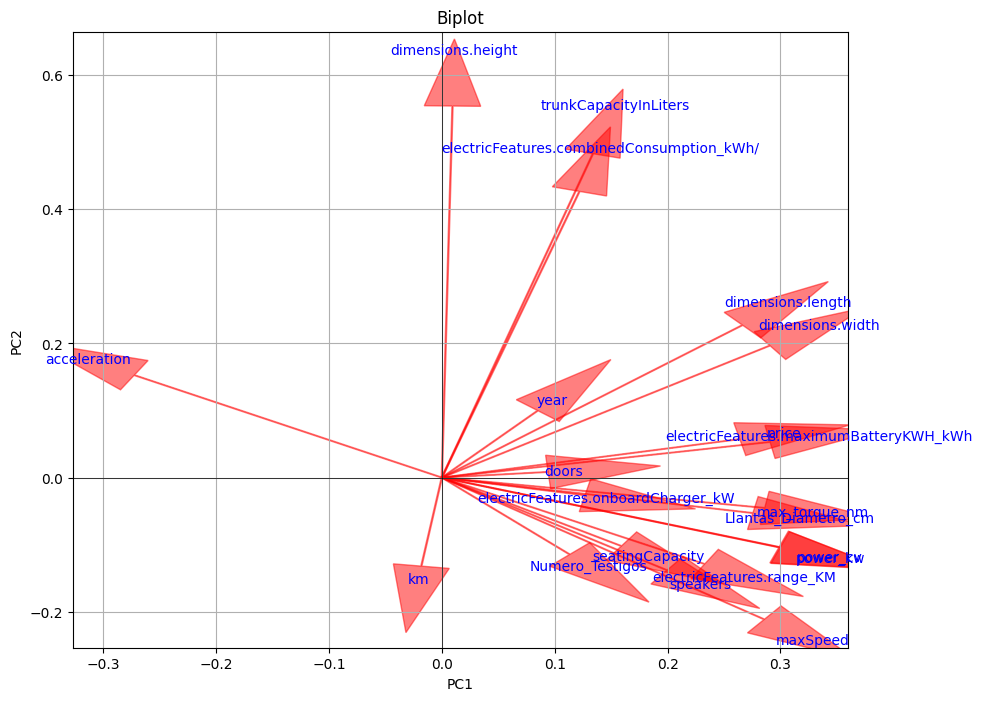

In [10]:
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(10, 8))
    origin = [0, 0]  # Origen de las flechas

    # Dibujar las flechas
    for i in range(len(coeff)):
        plt.arrow(origin[0], origin[1], coeff[i,0], coeff[i,1], color='r', alpha=0.5, head_width=0.05, head_length=0.1)
        if labels is not None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='blue', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Biplot")
    plt.grid(True)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.xlim(min(coeff[:,0])*1.2, max(coeff[:,0])*1.2)
    plt.ylim(min(coeff[:,1])*1.2, max(coeff[:,1])*1.2)
    plt.show()

# Llamada a la función biplot
biplot(principal_components, np.transpose(pca.components_[0:2, :]), labels=numerical_columns.columns)

In [11]:
numerical_columns.drop(columns=["Numero_Testigos", "dimensions.height", "doors", "electricFeatures.onboardCharger_kW", "seatingCapacity"], inplace=True)

## Test CART regression trees with only numerical variables

In [12]:
X = numerical_columns.drop(columns="price")
y = numerical_columns["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

MAE: 3747.3947192007313 
 MSE: 49956496.7132413 
 RMSE: 7067.990995554628 
 R2: 0.877140067355602 
 MAPE: 10.937480693335253
Mean: 3747.3947192007313
Variance: 35913529.53174777
Standard Deviation: 5992.78979539144


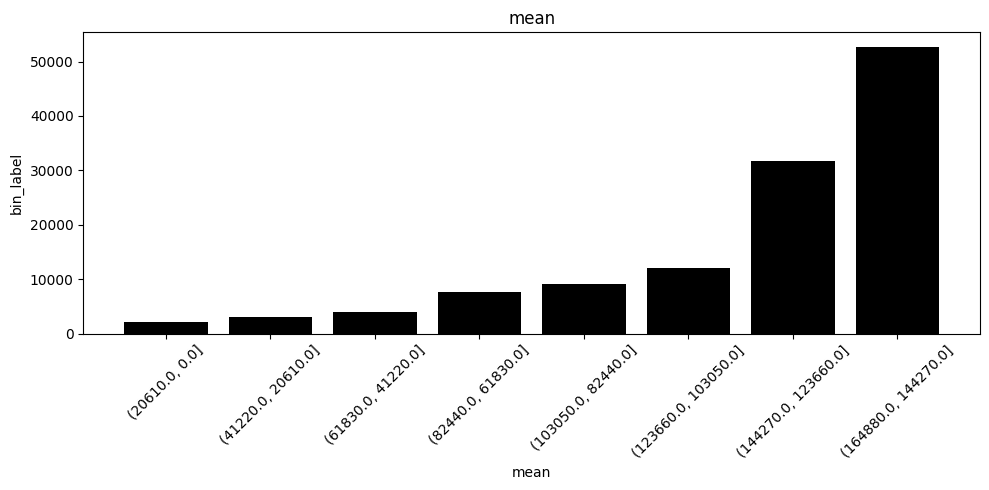

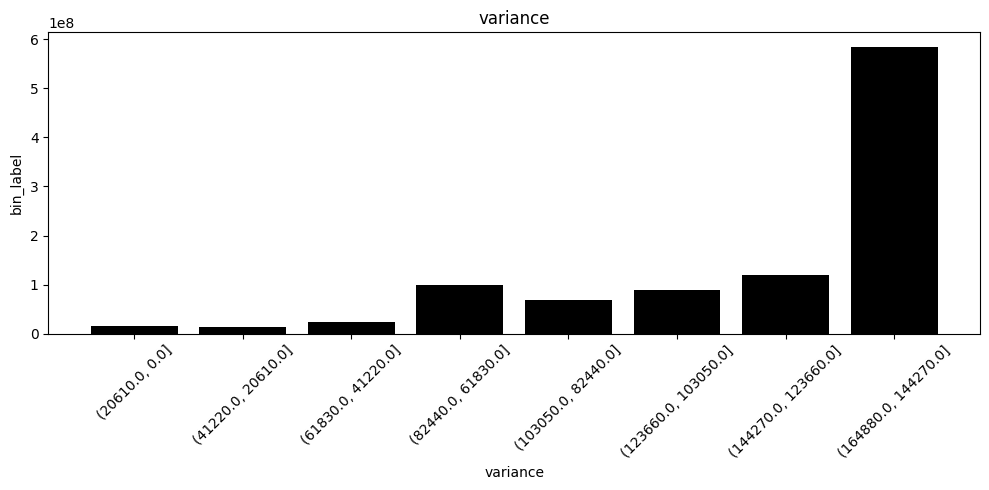

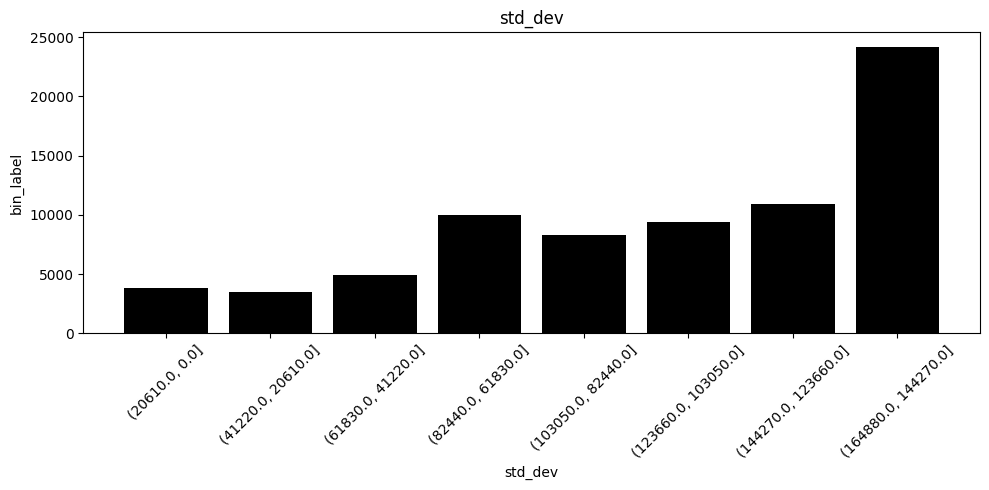

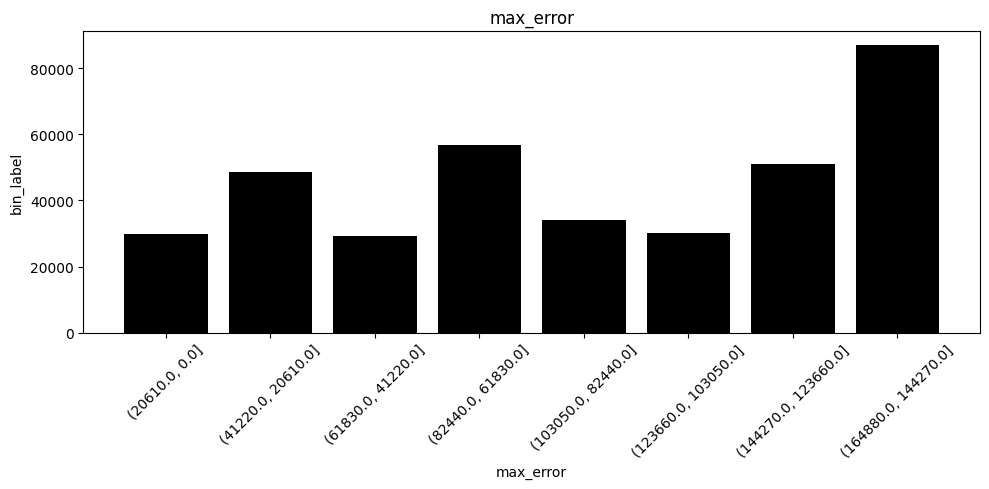

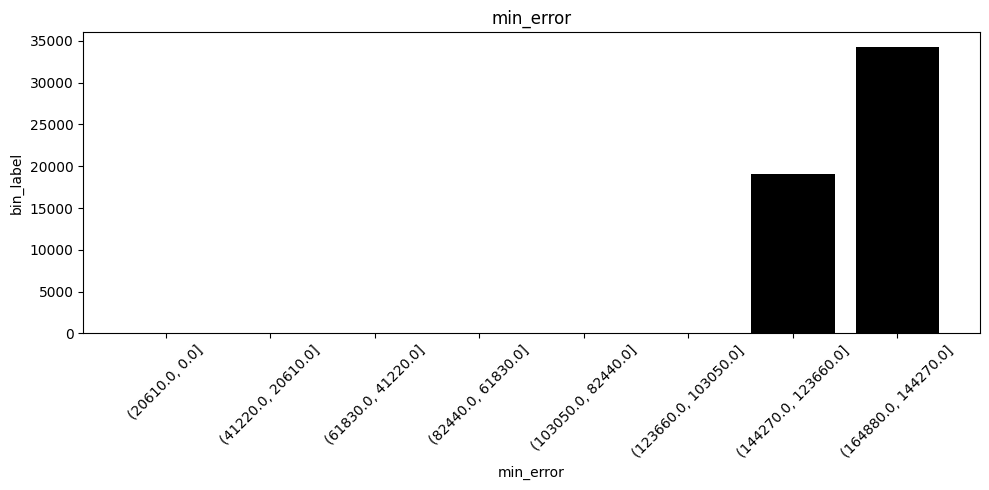

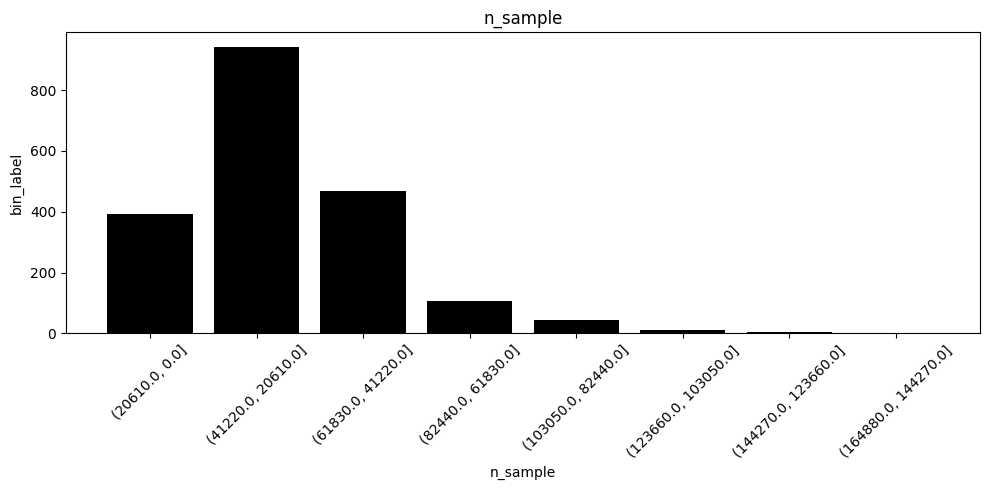

,bin_label,mean,variance,std_dev,max_error,min_error,n_sample
0,"(20610.0, 0.0]",2135.894558,1.486297e+07,3855.252774,29760.0,0.0,392
1,"(41220.0, 20610.0]",3073.702504,1.247990e+07,3532.690793,48503.0,0.0,943
2,"(61830.0, 41220.0]",3973.463063,2.433302e+07,4932.851306,29110.0,0.0,470
3,"(82440.0, 61830.0]",7591.232906,9.978624e+07,9989.306359,56800.0,0.0,108
4,"(103050.0, 82440.0]",9067.864341,6.947924e+07,8335.421047,34000.0,0.0,43
5,"(123660.0, 103050.0]",11989.166667,8.845091e+07,9404.834270,30000.0,0.0,12
6,"(144270.0, 123660.0]",31799.133333,1.199944e+08,10954.194220,51010.0,19040.0,5
7,"(164880.0, 144270.0]",52736.666667,5.851234e+08,24189.323173,86910.0,34300.0,3


In [13]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Realizar predicciones sobre el conjunto de prueba
y_pred = tree_model.predict(X_test)

Evaluator.eval_regression(y_pred, y_test, plot= True, bins=10)

## Electrico categorical variables
Here we will perform CA and Chi2 test to select the best categorical variables

In [14]:
def get_electric_categorical_columns(df: pd.DataFrame) -> pd.DataFrame:
    ret = df.select_dtypes(include=['category'])
    ret = ret.drop(columns=["environmentalLabel"]) #All of the cars of this dataframes are electrical which implies 0 emission
    ret = Data_processor.remove_redundand_columns(ret)
    ret = Data_processor.impute_categorical_mode(df=ret, X=["brand", "model"], Y="version")
    ret = Data_processor.impute_categorical_mode(df=ret, X=["brand", "model"], Y="jato_classification")
    ret = Data_processor.impute_categorical_mode(df=ret, X=["brand", "model", "traction"], Y="brakes")
    ret = Data_processor.impute_categorical_mode(df=ret, X=["brand", "model", "traction","brakes"], Y="front_suspension")
    ret = Data_processor.impute_categorical_mode(df=ret, X=["brand", "model", "traction","brakes"], Y="rear_suspension")
    return ret

In [15]:
categorical_columns = get_electric_categorical_columns(data)
print("\nCategorical Columns Index:")
print(categorical_columns.index)

Number of missing values in 'version' before filling with 'unknown': 1
Number of missing values in 'jato_classification' before filling with 'unknown': 0
Number of missing values in 'brakes' before filling with 'unknown': 0
Number of missing values in 'front_suspension' before filling with 'unknown': 0
Number of missing values in 'rear_suspension' before filling with 'unknown': 4

Categorical Columns Index:
Index([47362, 47511, 47535, 47559, 47603, 47617, 47858, 47988, 47989, 47997,
       ...
       94133, 94139, 94158, 94161, 94194, 94291, 94342, 94359, 94436, 94557],
      dtype='int64', name='idx', length=6591)


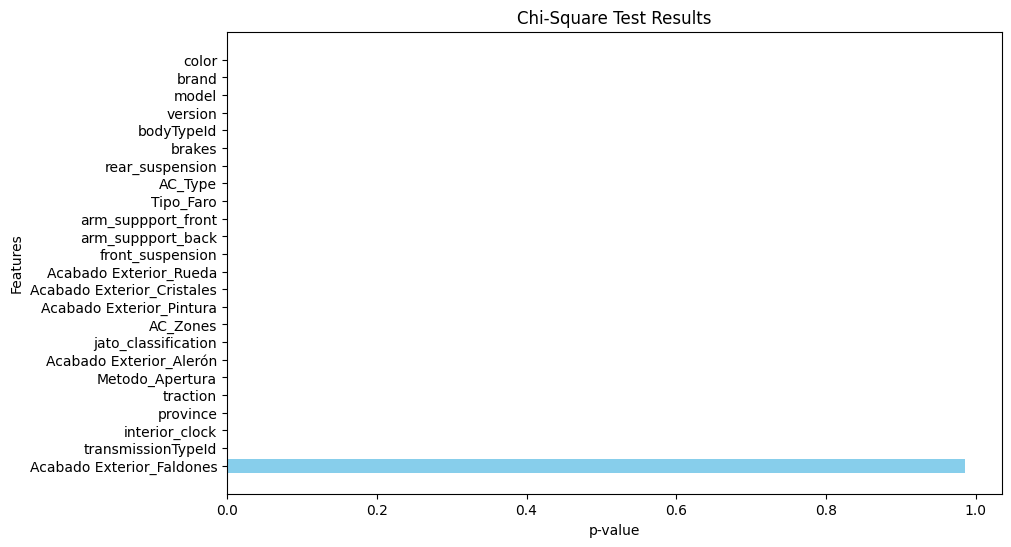

,Feature,Chi2 Stat,p-value
0,color,17355.917738,0.000000e+00
1,brand,1800.198086,0.000000e+00
2,model,15590.848906,0.000000e+00
3,version,19903.204434,0.000000e+00
4,bodyTypeId,6530.816750,0.000000e+00
9,brakes,1581.335781,0.000000e+00
11,rear_suspension,1848.387572,0.000000e+00
18,AC_Type,1486.737498,0.000000e+00
20,Tipo_Faro,1590.069687,0.000000e+00
22,arm_suppport_front,3759.181818,0.000000e+00


In [16]:
Data_processor.chi_square_test(categorical_columns=categorical_columns, column_y="price_categ")

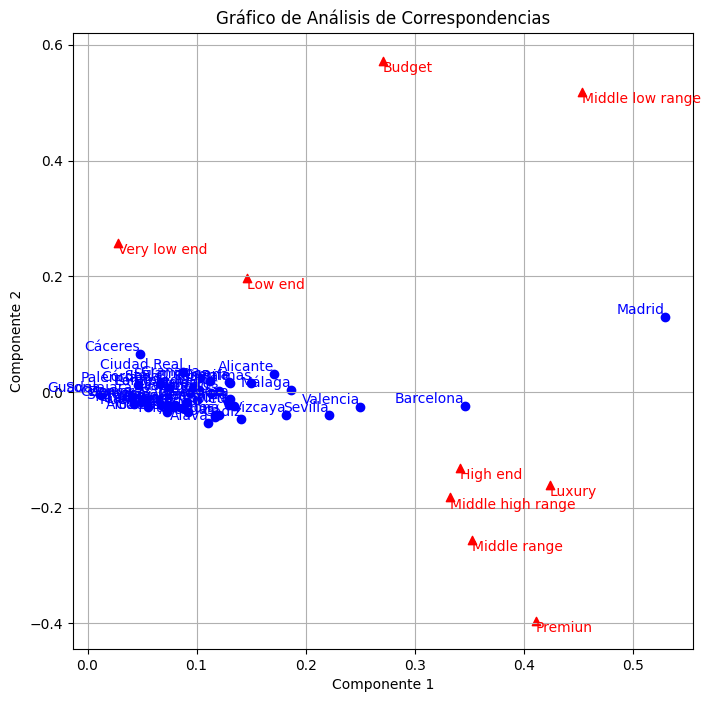

In [17]:
Data_processor.CA(categorical_columns=categorical_columns, col_x="province", col_y="price_categ")

In [18]:
categorical_columns["price_categ"].value_counts()

price_categ
Middle low range     1353
Luxury               1182
Premiun              1113
Middle range          820
High end              767
Middle high range     727
Budget                483
Low end               141
Very low end            5
Name: count, dtype: int64

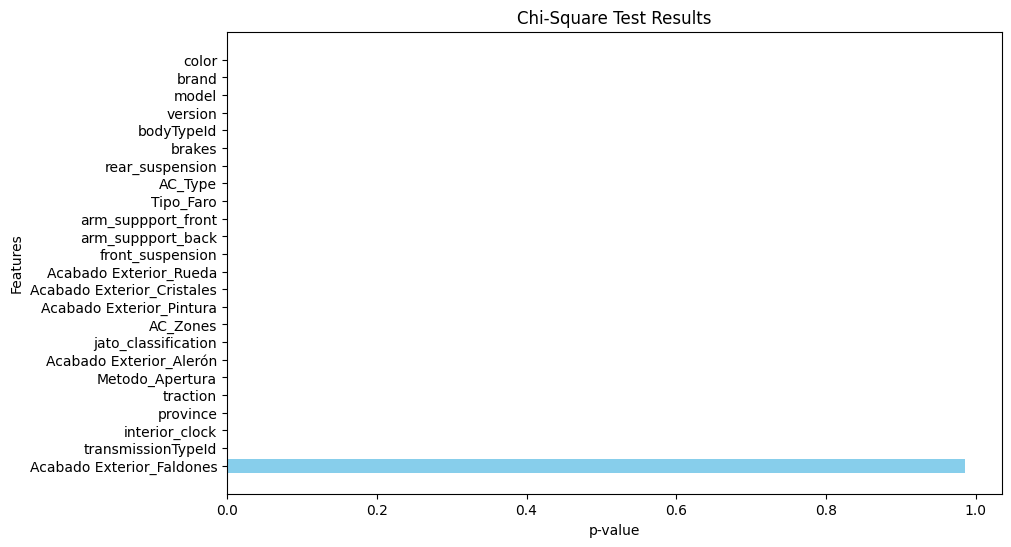

Index(['color', 'brand', 'model', 'version', 'bodyTypeId', 'brakes',
       'rear_suspension', 'AC_Type', 'Tipo_Faro', 'arm_suppport_front',
       'arm_suppport_back', 'price_categ'],
      dtype='object')

In [19]:
categorical_columns = Data_processor.chi_square_filter(categorical_columns, "price_categ", p_value_filter=0)
categorical_columns.columns

## Test CART tree classifier with only categorical values

In [20]:
features_df = pd.get_dummies(categorical_columns.drop('price_categ', axis=1))

# Your target variable
target = categorical_columns['price_categ'].apply(Loader.encode_price_categ)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df, target, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

# Predicting the test set results
y_pred = cart_model.predict(X_test)


In [21]:
result = pd.DataFrame({"Real_Categorie": y_test, "Prediction": y_pred})
result["diff"] = np.abs(result["Real_Categorie"].astype(int) - result["Prediction"])
result["Real_Categorie"] = result["Real_Categorie"].apply(Loader.decode_price_categ)
result["Prediction"] = result["Prediction"].apply(Loader.decode_price_categ)
result

,Real_Categorie,Prediction,diff
idx,,,
45867,Premiun,Middle high range,2
164049,Middle high range,Middle high range,0
7873,Premiun,Premiun,0
134505,Budget,Budget,0
16439,Luxury,Luxury,0
...,...,...,...
16322,Luxury,Luxury,0
60749,Premiun,Premiun,0
34691,High end,Premiun,1


In [22]:
# Calcular la precisión
Evaluator.eval_classfication(y_pred=result["Prediction"].to_numpy(), y_true=result["Real_Categorie"].to_numpy(), binary_classification=False)

Accuracy: 0.6203235591506572 
 Precision: 0.6195761164516269 
 Recall: 0.6203235591506572 
 F1 Score: 0.6160049803072201
Confusion Matrix:
 [[307   3   2   1  17  27  26   1   0]
 [ 13  94   0  12  46   0  19  65   0]
 [  1   0  29   0   1  14   1   0   0]
 [  8   6   0 255  11   0   1  73   0]
 [ 23  31   0   2  99   0  49  13   0]
 [ 32   0  14   0   0  92   0   3   0]
 [ 75  12   1   0  43   1 123   2   0]
 [  1  40   0  41  12   0   6 228   0]
 [  0   0   2   0   0   0   0   0   0]]


/home/lingfeng/Desktop/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


We can verify that the prediction is not very accurate but we need to know how big is the error.

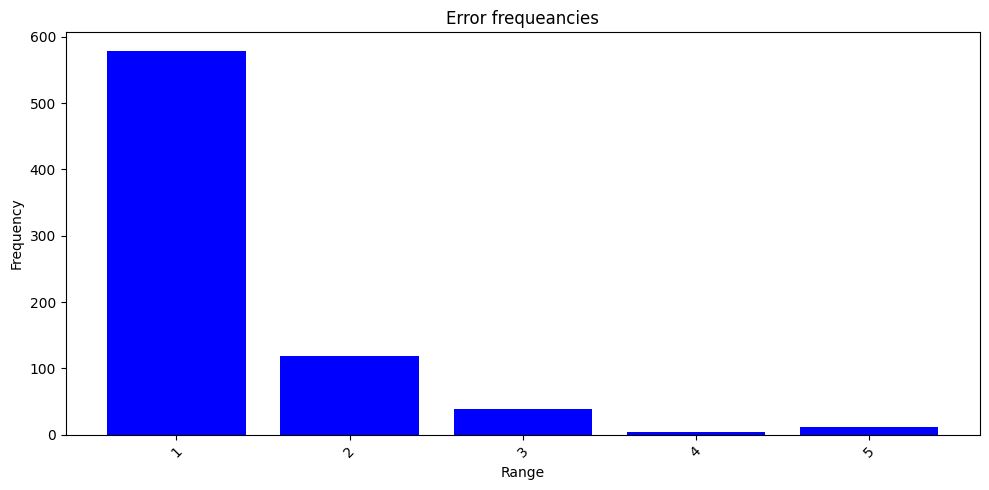

{1: 578, 2: 118, 3: 39, 4: 4, 5: 12}
Error mean: 1.340878828229028
Error rate: 37.96764408493428 %
Overall mean: 0.5091001011122346


In [23]:
Evaluator.eval_ordinal_classification (result["diff"])

Even having errors, we can verify that the errors are not that big

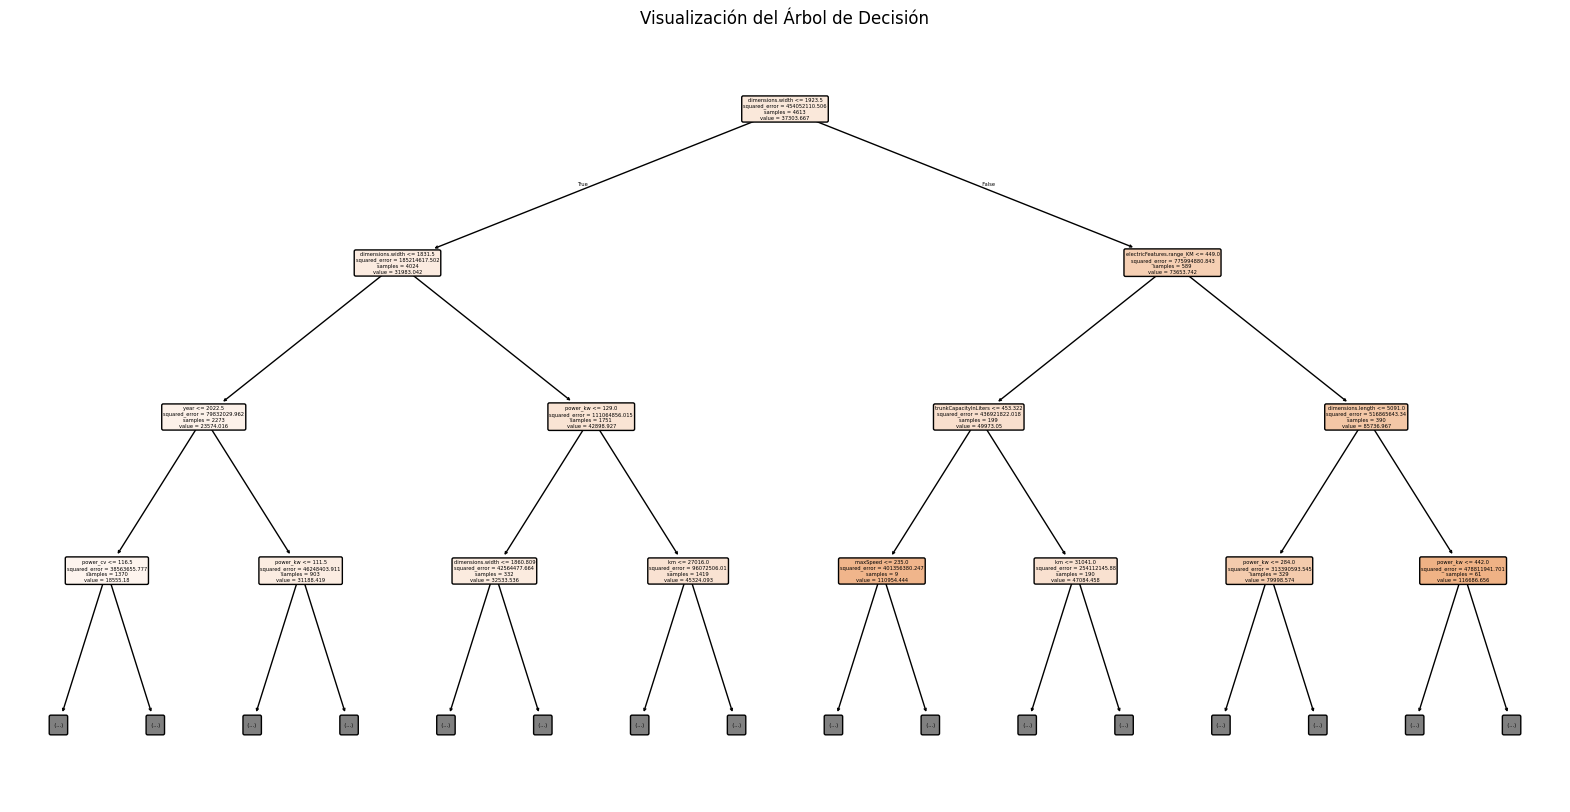

In [24]:
plt.figure(figsize=(20,10))

# Dibujar el árbol de decisión
plot_tree(tree_model, 
          filled=True, 
          rounded=True, 
          class_names=X_train.columns, 
          feature_names=X.columns, 
          max_depth=3)  # Puedes ajustar la profundidad para una mejor visualización o quitar este parámetro para mostrar todo el árbol
plt.title('Visualización del Árbol de Decisión')
plt.show()

# Agorithms evaluation

In [25]:
electric_cars = pd.merge(numerical_columns, categorical_columns, left_index=True, right_index=True, how='inner')
numerical_column_names = list(numerical_columns.columns)
categorical_column_names = list(categorical_columns.columns)
print(electric_cars.shape)
target = electric_cars[["price", "price_categ"]]
electric_cars.drop(columns=["price", "price_categ"], inplace=True)


numerical_column_names.remove("price")
categorical_column_names.remove("price_categ")

encoders_and_scalers = {}
for column in numerical_column_names:
    scaler = StandardScaler()
    electric_cars[[column]] = scaler.fit_transform(electric_cars[[column]])
    encoders_and_scalers[column] = scaler 

electric_cars_encoded = pd.get_dummies(electric_cars, columns=categorical_column_names)
print(electric_cars_encoded.shape)

(6591, 28)
(6591, 9182)


## Classification

In [26]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(electric_cars_encoded, target['price_categ'], test_size=0.3, random_state=42)

In [27]:
from sklearn.model_selection import cross_val_score


def eval_classification(y_test, y_pred):
    result = pd.DataFrame({"Real": y_test, "Prediction": y_pred})
    result["diff"] = result["Real"].apply(Loader.encode_price_categ).to_numpy() - result["Prediction"].apply(Loader.encode_price_categ).to_numpy()
    Evaluator.eval_ordinal_classification(diff=result["diff"])

def classify(X_train, X_test, y_train, y_test , classifier, classifier_name = None) -> None:
    classifier.fit(X_train, y_train)

    # Predicting the test set results
    y_pred = classifier.predict(X_test)
    eval_classification(y_test, y_pred)

    if classifier_name != None:
        Evaluator.eval_classfication(y_pred = y_pred, y_true=y_test, binary_classification=False, classifier_name=classifier_name)
    else:  Evaluator.eval_classfication(y_pred = y_pred, y_true=y_test, binary_classification=False)
    cv_scores = cross_val_score(classifier, X_test, y_test, cv=5, scoring='accuracy')
    Evaluator.plot_bar_chart_key_value(keys= [f"Fold {i+1}" for i in range(len(cv_scores))], values=cv_scores, title=f"Accuracy 5 folder Cross-validation", xlabel="fold", ylabel="accuracy")




### CART

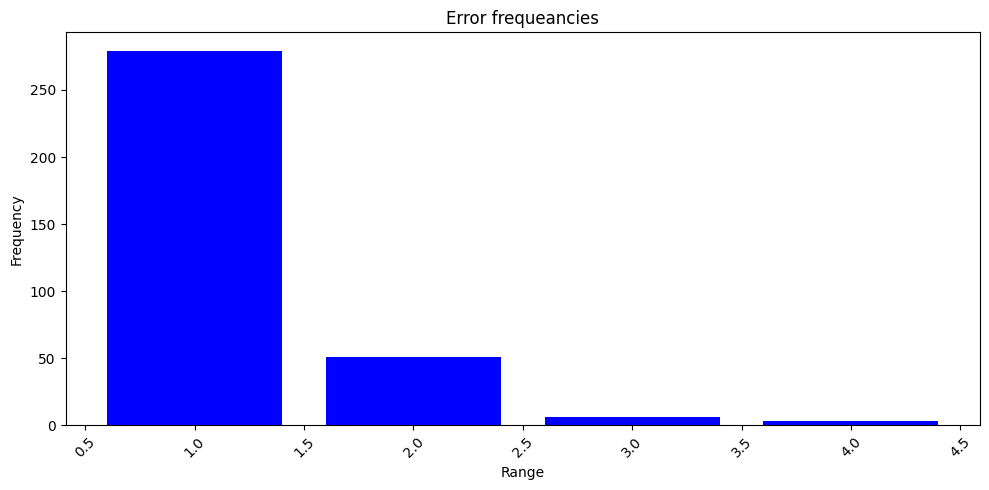

{1: 279, 2: 51, 3: 6, 4: 3}
Error mean: 1.2123893805309736
Error rate: 17.138523761375126 %
Overall mean: 0.022244691607684528
Accuracy: 0.6759352881698686 
 Precision: 0.6777558305980648 
 Recall: 0.6759352881698686 
 F1 Score: 0.6753113021116468
Confusion Matrix:
 [[106   3  14   0   0  18   0   0   0]
 [  0 118   0   3  47   2  18  61   0]
 [  9   1  32   0   1   2   0   0   1]
 [  0   5   0 283   2   0   3  61   0]
 [  0  37   0   1 119  15  34  11   0]
 [ 26   1   1   0  12 308  36   0   0]
 [  1  12   0   1  54  55 134   0   0]
 [  0  41   0  37  11   0   2 237   0]
 [  2   0   0   0   0   0   0   0   0]]


/home/lingfeng/Desktop/tensorflow/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


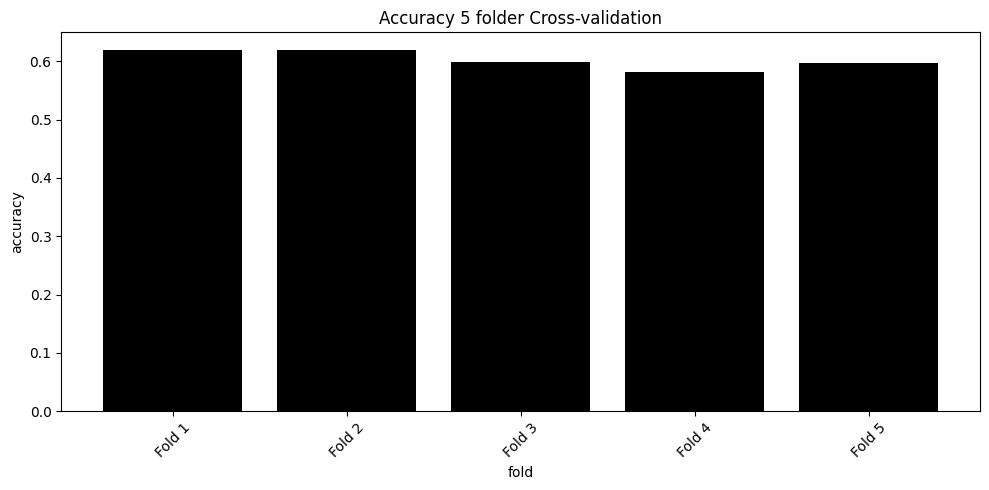

In [28]:
classify(X_train, X_test, y_train, y_test, DecisionTreeClassifier(random_state=42), classifier_name="CART")

### Random forest
Random forest can get a better result at a higher computational time cost

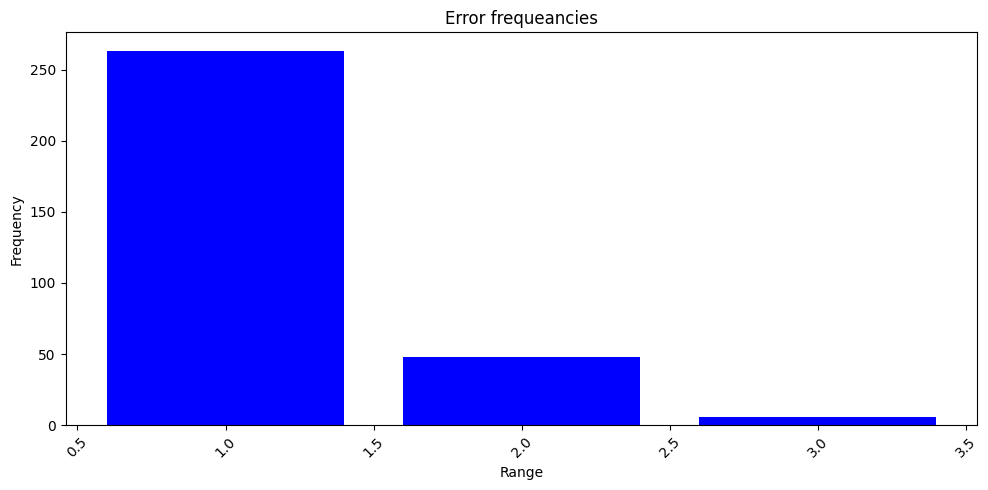

{1: 263, 2: 48, 3: 6}
Error mean: 1.1892744479495267
Error rate: 16.0262891809909 %
Overall mean: 0.03083923154701719
Accuracy: 0.7007077856420627 
 Precision: 0.7015237823993151 
 Recall: 0.7007077856420627 
 F1 Score: 0.6986833076206627
Confusion Matrix:
 [[101   0  13   0   0  27   0   0   0]
 [  0 118   0   2  42   3  20  64   0]
 [  8   0  36   0   1   1   0   0   0]
 [  0   5   0 289   1   0   0  59   0]
 [  0  27   0   1 128  12  37  12   0]
 [ 18   1   0   0   9 323  33   0   0]
 [  0   8   0   0  45  56 148   0   0]
 [  0  38   0  34  11   0   2 243   0]
 [  2   0   0   0   0   0   0   0   0]]


/home/lingfeng/Desktop/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/lingfeng/Desktop/tensorflow/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


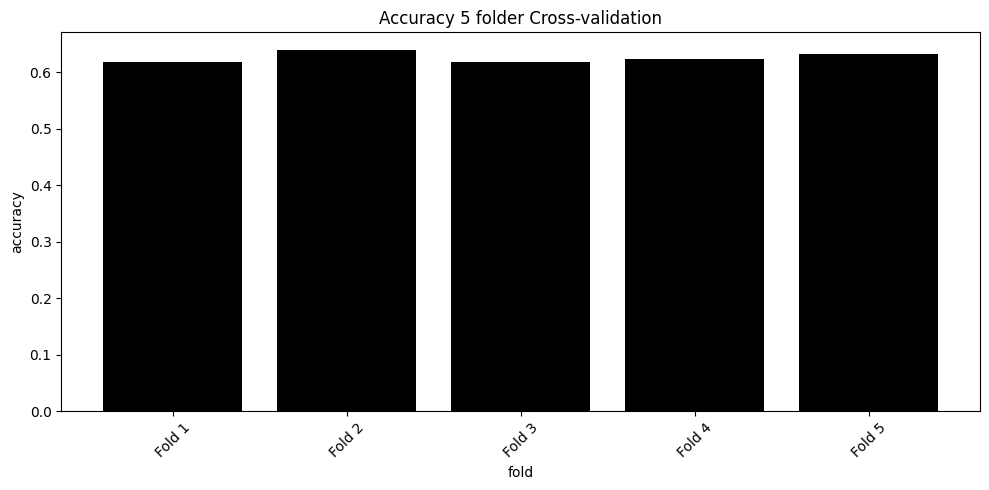

In [29]:
classify(X_train, X_test, y_train, y_test, RandomForestClassifier(random_state=42), classifier_name="RandomForestClassifier")

### SVM
Much higher computational cost, more distributed error, but in overall worse result

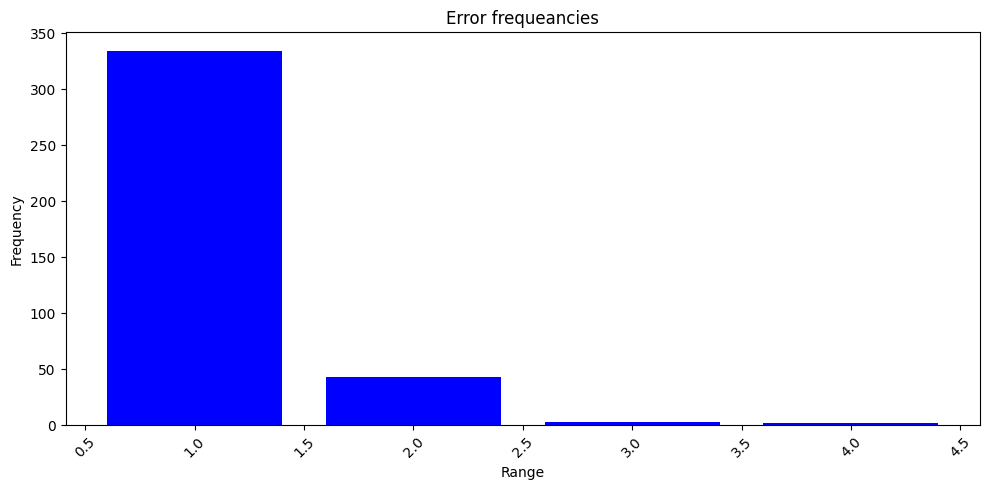

{1: 334, 2: 43, 3: 3, 4: 2}
Error mean: 1.143979057591623
Error rate: 19.312436804853387 %
Overall mean: 0.056622851365015166
Accuracy: 0.660262891809909 
 Precision: 0.6683519866903976 
 Recall: 0.660262891809909 
 F1 Score: 0.6564946864444253
Confusion Matrix:
 [[106   0   6   0   0  29   0   0   0]
 [  0  98   0   2  52   1  26  70   0]
 [ 18   0  25   1   0   1   1   0   0]
 [  0   4   0 250   0   0   1  99   0]
 [  0  41   0   1  90   5  68  12   0]
 [ 27   0   0   0   2 312  43   0   0]
 [  0   4   0   1  37  54 161   0   0]
 [  0  28   0  25   8   1   2 264   0]
 [  1   0   1   0   0   0   0   0   0]]


/home/lingfeng/Desktop/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/lingfeng/Desktop/tensorflow/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


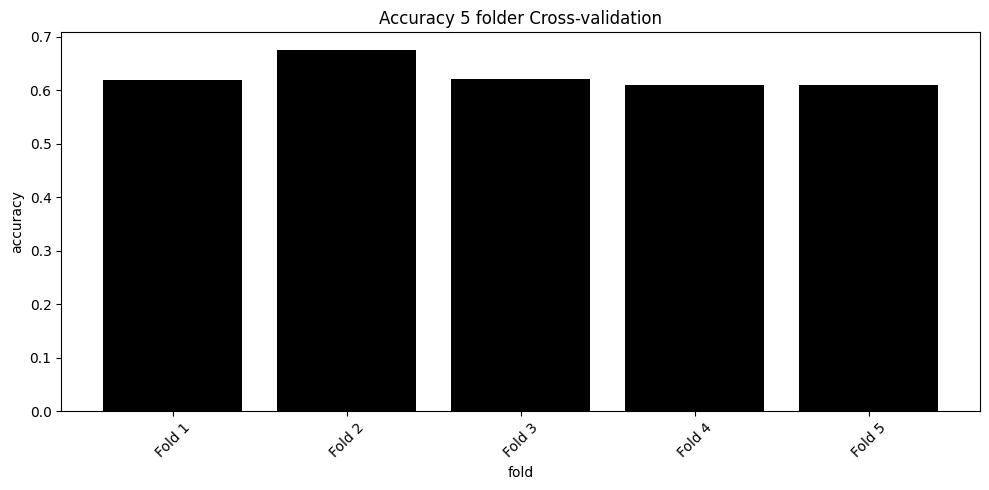

In [30]:
classify(X_train, X_test, y_train, y_test, SVC(random_state=42), classifier_name="SVC")

### Naive bayes

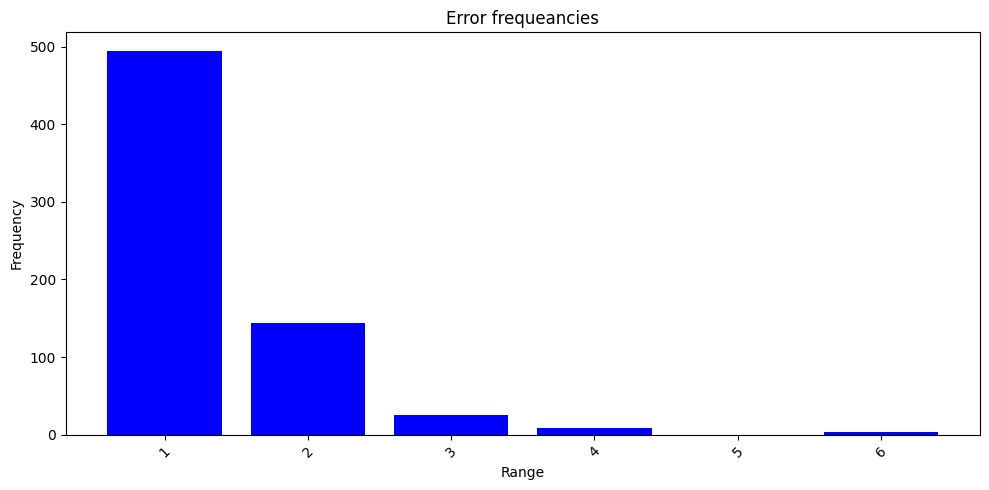

{1: 494, 2: 144, 3: 25, 4: 8, 6: 3}
Error mean: 1.3456973293768546
Error rate: 34.07482305358948 %
Overall mean: 0.2826086956521739
Accuracy: 0.506066734074823 
 Precision: 0.5903626980530923 
 Recall: 0.506066734074823 
 F1 Score: 0.49755551886389016
Confusion Matrix:
 [[ 93   0  37   0   0   8   3   0   0]
 [  1 116   0   6  61   1  49  15   0]
 [  4   0  37   0   1   1   0   0   3]
 [  2  43   0 275   9   0   7  18   0]
 [  1  35   0   1  87   3  88   2   0]
 [119   1  18   0  17 107 121   1   0]
 [ 12   6   2   0  23  19 195   0   0]
 [  0 149   1  56  19   0  12  91   0]
 [  0   0   2   0   0   0   0   0   0]]


/home/lingfeng/Desktop/tensorflow/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


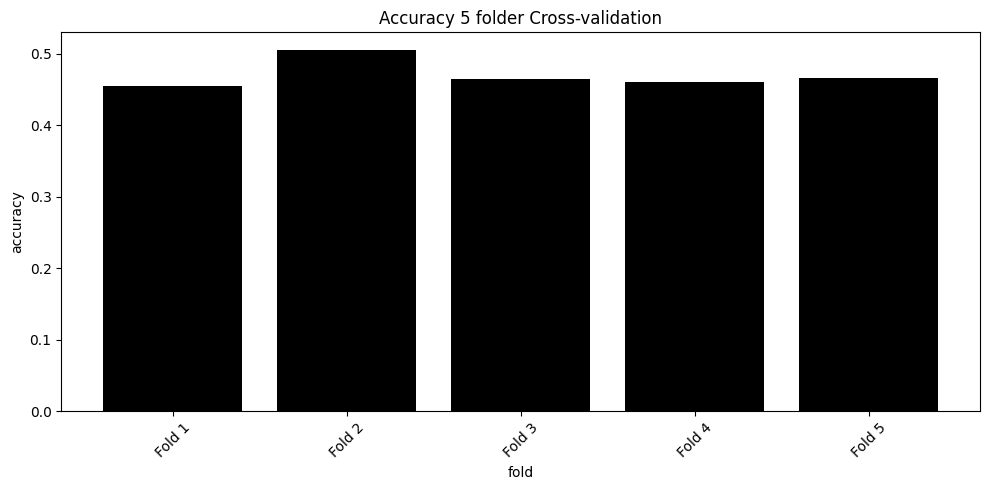

In [31]:
classify(X_train, X_test, y_train, y_test, GaussianNB(), classifier_name="Naive bayes")

### ANN

In [32]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(target[['price_categ']])

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    electric_cars_encoded, y_encoded, test_size=0.3, random_state=42
)

# Step 3: Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Define the ANN model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Softmax for multi-class classification

# Step 5: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128)

/home/lingfeng/Desktop/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1732528885.082600   21596 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3870 - loss: 1.7349 - val_accuracy: 0.6218 - val_loss: 1.0262
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7544 - loss: 0.7533 - val_accuracy: 0.6370 - val_loss: 0.9459
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7759 - loss: 0.5837 - val_accuracy: 0.6350 - val_loss: 0.9533
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7946 - loss: 0.5031 - val_accuracy: 0.6491 - val_loss: 0.9654
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8044 - loss: 0.4910 - val_accuracy: 0.6405 - val_loss: 0.9767
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8118 - loss: 0.4628 - val_accuracy: 0.6421 - val_loss: 0.9933
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8130 - loss: 0.4543 - val_accuracy: 0.6461 - val_loss: 0.9881
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8241 - loss: 0.4260 - val_accuracy: 0.

In [33]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [34]:
Evaluator.eval_classfication(y_pred=y_pred_classes, y_true=y_test_classes, binary_classification=False, classifier_name="ANN")

Accuracy: 0.6557128412537917 
 Precision: 0.6608694913665271 
 Recall: 0.6557128412537917 
 F1 Score: 0.6546115889616131
Confusion Matrix:
 [[ 98   0  17   0   0  25   0   1   0]
 [  1 114   1   4  54   4  11  60   0]
 [ 13   0  32   0   0   1   0   0   0]
 [  0  13   0 272   3   0   1  65   0]
 [  0  30   0   0 126  12  35  14   0]
 [ 28   0   2   0  20 304  29   1   0]
 [  0   9   0   6  67  58 116   1   0]
 [  0  45   0  35   8   1   4 235   0]
 [  1   0   1   0   0   0   0   0   0]]


/home/lingfeng/Desktop/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Regression

In [35]:
X_train, X_test, y_train, y_test = train_test_split(electric_cars_encoded, target['price'], test_size=0.3, random_state=42)

In [36]:
def regression(X_train, X_test, y_train, y_test , regressor, regressor_name = None) -> None:
    regressor.fit(X_train, y_train)

    # Predicting the test set results
    y_pred = regressor.predict(X_test)
    if regressor_name != None:
        Evaluator.eval_regression(y_pred = y_pred, y_true=y_test, plot=False, n_features=len(electric_cars_encoded.columns), regressor_name=regressor_name)
    else :Evaluator.eval_regression(y_pred = y_pred, y_true=y_test, plot=False)
    mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
    cv_scores = -cross_val_score(regressor, X_test, y_test, cv=5, scoring=mape_scorer)
    Evaluator.plot_bar_chart_key_value(keys= [f"Fold {i+1}" for i in range(len(cv_scores))], values=cv_scores, title=f"Accuracy 5 folder Cross-validation", xlabel="fold", ylabel="MAPE")

### Cart

MAE: 3698.0075834175937 
 MSE: 62391364.92414925 
 RMSE: 7898.820476764189 
 R2: 0.8465585179806799 
 MAPE: 10.728932166976714
Mean: 3698.0075834175937
Variance: 48716104.837135226
Standard Deviation: 6979.692316795578
r2_adjusted: 1.0421032352466615


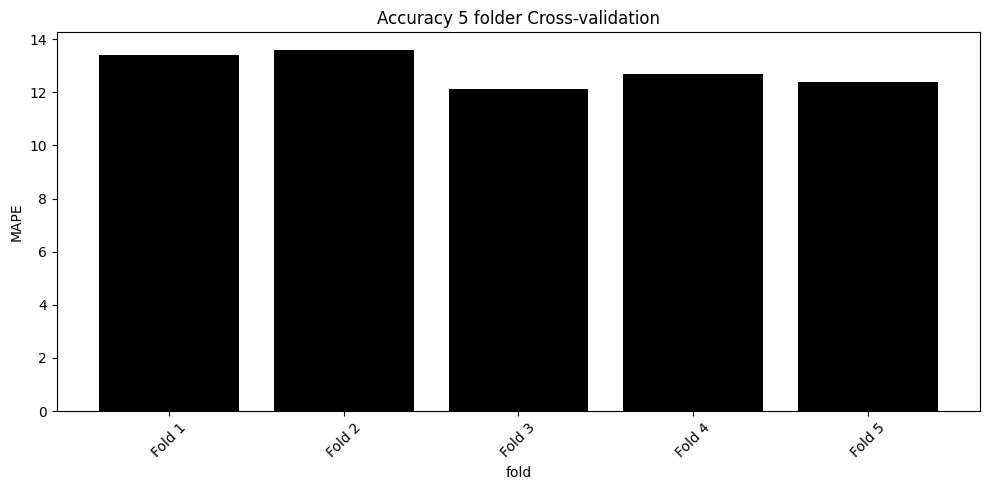

In [37]:
regression(X_train, X_test, y_train, y_test , DecisionTreeRegressor(random_state=42), regressor_name="CART")

### RandomForest

MAE: 3160.3188276379065 
 MSE: 39976214.66499038 
 RMSE: 6322.6746448785725 
 R2: 0.9016849586288764 
 MAPE: 9.249486024301499
Mean: 3160.3188276379065
Variance: 29988599.572667744
Standard Deviation: 5476.184764292358
r2_adjusted: 1.02697693779191


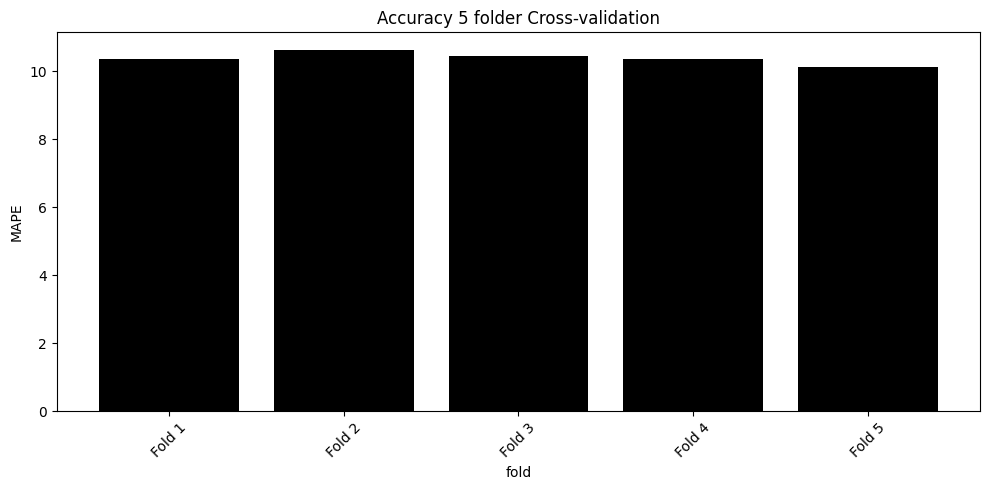

In [38]:
regression(X_train, X_test, y_train, y_test , RandomForestRegressor(random_state=42), regressor_name="RandomForest")

### SVM Regression

MAE: 13707.255809393228 
 MSE: 391204259.68477666 
 RMSE: 19778.884187051015 
 R2: 0.03789632665867537 
 MAPE: 47.36214689597216
Mean: 13707.255809393228
Variance: 203315397.8606323
Standard Deviation: 14258.870848024128
r2_adjusted: 1.2639943042603468


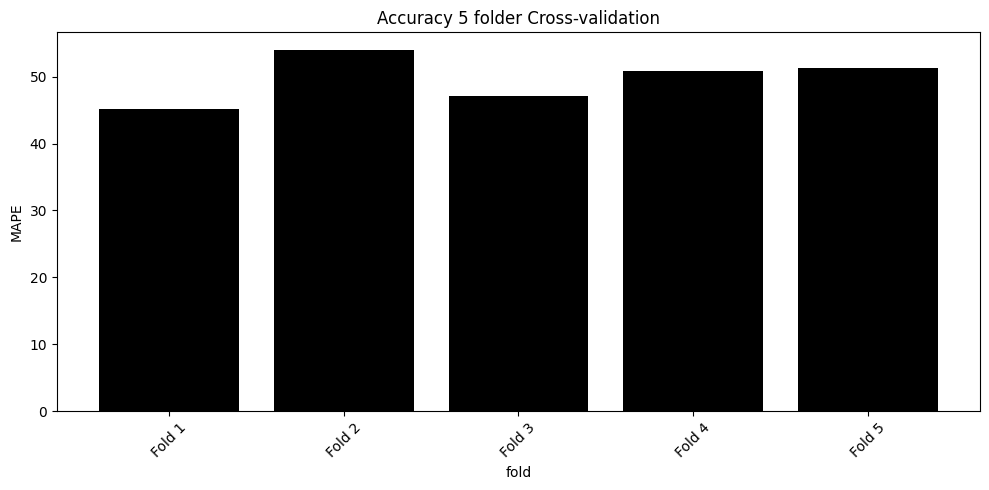

In [39]:
regression(X_train, X_test, y_train, y_test , SVR(kernel='sigmoid'), regressor_name="SVR")

### Multivariable regression

In [40]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = linear_regressor.predict(X_test)

# Optionally, display the coefficients of the model
print("Coefficients:", linear_regressor.coef_)
print("Intercept:", linear_regressor.intercept_)

Coefficients: [-1.99074143e+03  5.55205416e+03 -2.97170681e+03 ...  0.00000000e+00
  0.00000000e+00  1.40978522e+15]
Intercept: -2511704033636977.0


In [41]:
result = pd.DataFrame({"Real": y_test, "Prediction": y_pred})
result["diff"] = result["Real"].to_numpy() - result["Prediction"].to_numpy()

MAE: 10792145451881.137 
 MSE: 4.957344748787727e+27 
 RMSE: 70408413906206.75 
 R2: -1.2191788496043307e+19 
 MAPE: 54854010801.84761
Mean: 10792145451881.137
Variance: 4.840874345333169e+27
Standard Deviation: 69576392155192.766
r2_adjusted: 3.3453387726131323e+18


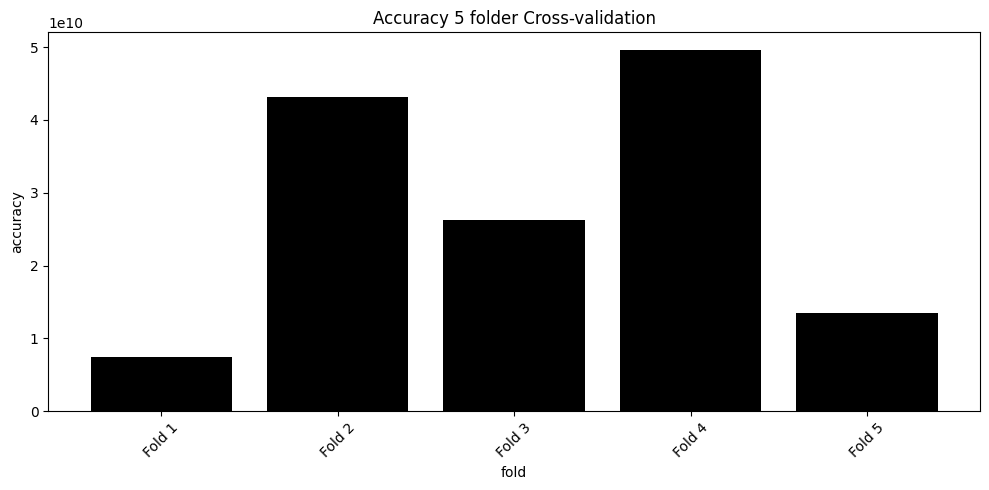

In [42]:
Evaluator.eval_regression(y_pred = y_pred, y_true=y_test, plot=False, n_features=len(electric_cars_encoded.columns), regressor_name="Lineal Regression")
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
cv_scores = -cross_val_score(linear_regressor, X_test, y_test, cv=5, scoring=mape_scorer)
Evaluator.plot_bar_chart_key_value(keys= [f"Fold {i+1}" for i in range(len(cv_scores))], values=cv_scores, title=f"Accuracy 5 folder Cross-validation", xlabel="fold", ylabel="accuracy")

In [43]:
result

,Real,Prediction,diff
idx,,,
45867,44822,3.691300e+04,7.909000e+03
164049,31490,3.138400e+04,1.060000e+02
7873,48850,5.514450e+04,-6.294500e+03
134505,24000,2.139050e+04,2.609500e+03
16439,54900,-7.932716e+13,7.932716e+13
...,...,...,...
16322,66900,3.048822e+12,-3.048822e+12
60749,40900,4.539300e+04,-4.493000e+03
34691,39900,3.925650e+04,6.435000e+02


### ANN

In [44]:
# Define the model
model = Sequential()

model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='linear'))
model.add(Dense(1))


/home/lingfeng/Desktop/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [46]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128)


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1846197248.0000 - mae: 37249.8672 - val_loss: 1763471744.0000 - val_mae: 36842.0078
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1878287744.0000 - mae: 37413.2461 - val_loss: 1683435392.0000 - val_mae: 35924.7812
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1643366272.0000 - mae: 35210.9297 - val_loss: 1071111232.0000 - val_mae: 28187.7402
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 843712832.0000 - mae: 23322.4805 - val_loss: 129477320.0000 - val_mae: 7539.7603
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 126986720.0000 - mae: 7660.9492 - val_loss: 99058056.0000 - val_mae: 6184.8960
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 92855488.0000 - mae: 6078.6338 - val_loss: 86438800.0000 - val_mae: 5803.7866
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 78645568.0000 - mae: 5740.0742 - val_loss: 76507072.0000 - val_mae: 5271.7075
Epoch 8/100


In [47]:
loss, mae = model.evaluate(X_test, y_test, verbose=2)
print(f"Mean Absolute Error on test set: {mae:.2f}")

62/62 - 0s - 2ms/step - loss: 36078860.0000 - mae: 3496.7114
Mean Absolute Error on test set: 3496.71


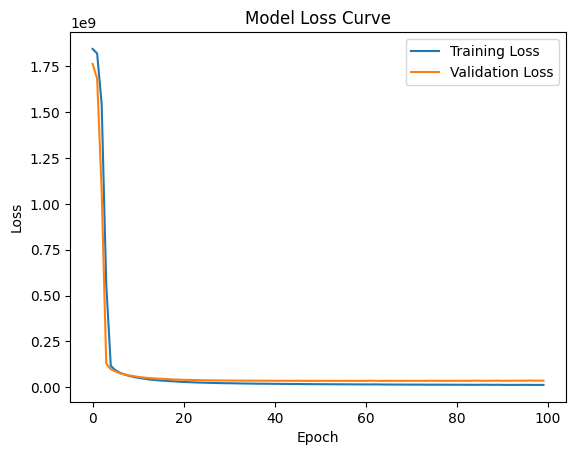

In [48]:
# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Curve')
plt.show()

In [49]:
y_pred = model.predict(X_test).flatten()

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [50]:
Evaluator.eval_regression(y_pred=y_pred, y_true=y_test, plot=False, n_features=len(electric_cars_encoded.columns), regressor_name="ANN")

MAE: 3496.711069321126 
 MSE: 36078855.72730116 
 RMSE: 6006.567716033938 
 R2: 0.9112699031829834 
 MAPE: 10.123930842547532
Mean: 3496.711069321126
Variance: 23851867.424988262
Standard Deviation: 4883.837366762766
r2_adjusted: 1.0243468981828232


,bin_label,mean,variance,std_dev,max_error,min_error,n_sample
0,"(41220.0, 0.0]",2604.409572,6.245399e+06,2499.079556,20607.984375,0.136719,1335
1,"(82440.0, 41220.0]",4445.195958,1.763328e+07,4199.199932,38271.503906,8.128906,578
2,"(123660.0, 82440.0]",8317.389489,5.396531e+07,7346.108665,31657.546875,84.625000,55
3,"(164880.0, 123660.0]",29075.458984,3.225248e+08,17958.976777,67445.343750,10337.234375,8


In [51]:
Evaluator.save("electric_plug")

Regression results saved to: evaluation/electric_plug_regression.tex
Classification results saved to: evaluation/electric_plug_classification.tex
